In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Fish.csv')

In [3]:
data.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
111,Perch,840.0,32.5,35.0,37.3,11.4884,7.7957
70,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
139,Pike,770.0,44.8,48.0,51.2,7.6800,5.3760
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
108,Perch,320.0,27.8,30.0,31.6,7.6156,4.7716
19,Bream,650.0,31.0,33.5,38.7,14.4738,5.7276
103,Perch,260.0,25.4,27.5,28.9,7.1672,4.3350
31,Bream,955.0,35.0,38.5,44.0,18.0840,6.2920
92,Perch,150.0,20.5,22.5,24.0,6.7920,3.6240


In [4]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
data.shape

(159, 7)

In [7]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
data.isnull().values.any()

False

In [9]:
d1=data['Species'].value_counts()

In [10]:
spec=pd.DataFrame(d1)

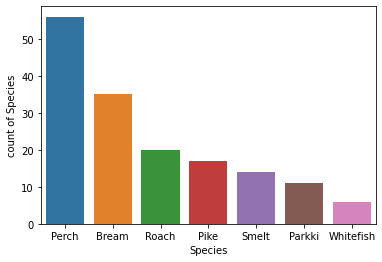

In [11]:
sns.barplot(spec.index,spec['Species'])
plt.xlabel("Species")
plt.ylabel("count of Species")
plt.show()

In [12]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


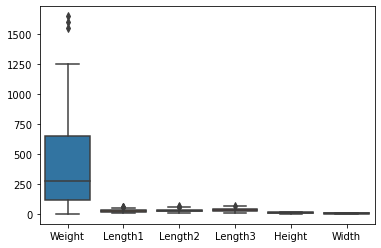

In [13]:
sns.boxplot(data=data)

In [14]:
data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


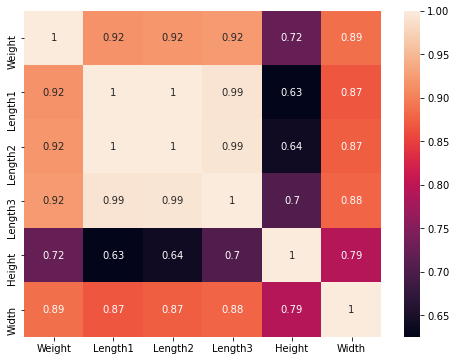

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

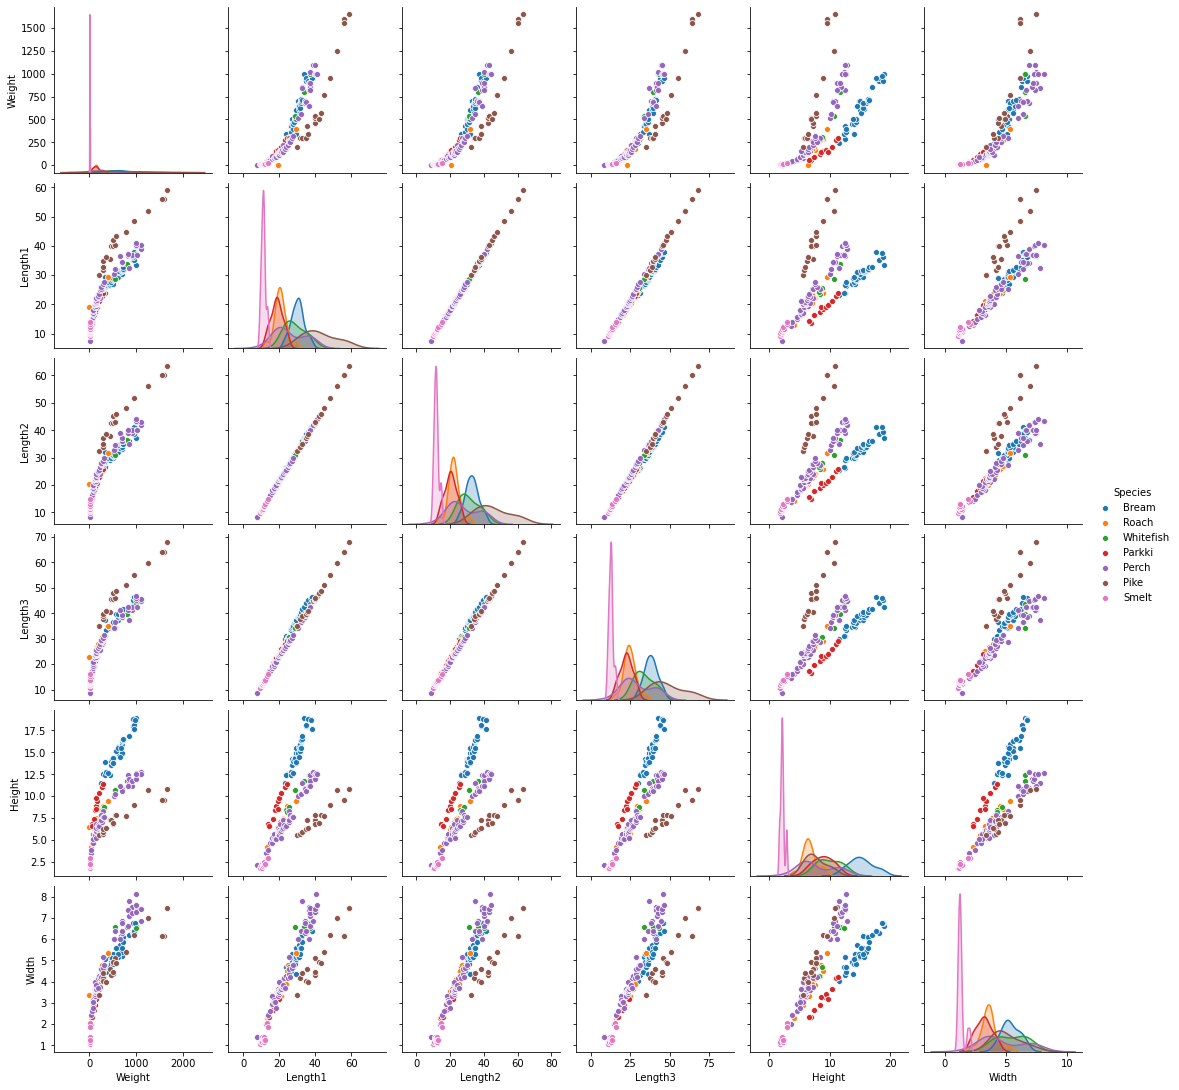

In [16]:
sns.pairplot(data=data,hue='Species')
plt.show()

removing outlier using IQR(inter qurtile range)

In [17]:
out=data['Weight']
qun1,qun3=np.percentile(data['Weight'],[25,75])
print(qun1,qun3)

120.0 650.0


In [18]:
iqr=qun3-qun1
print(iqr)
lower=qun1-(1.5*iqr)
upper=qun3+(1.5*iqr)
print(lower,upper)

530.0
-675.0 1445.0


In [19]:
outlier=out[(out<lower)|(out>upper)]
outlier

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [20]:
out_len=data['Length1']
qun1_l1,qun3_l1=np.percentile(data['Length1'],[25,75])
iqr_l1=qun3_l1-qun1_l1
lower_l1=qun1_l1-(1.5*iqr_l1)
upper_l1=qun3_l1+(1.5*iqr_l1)
outlier=out_len[(out_len<lower_l1)|(out_len>upper_l1)]
outlier

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

In [21]:
out_len=data['Length2']
qun1_l2,qun3_l2=np.percentile(data['Length2'],[25,75])
iqr_l2=qun3_l2-qun1_l2
lower_l2=qun1_l2-(1.5*iqr_l2)
upper_l2=qun3_l2+(1.5*iqr_l2)
outlier=out_len[(out_len<lower_l2)|(out_len>upper_l2)]
outlier

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

In [22]:
out_len=data['Length3']
qun1_l3,qun3_l3=np.percentile(data['Length3'],[25,75])
iqr_l3=qun3_l3-qun1_l3
lower_l3=qun1_l3-(1.5*iqr_l3)
upper_l3=qun3_l3+(1.5*iqr_l3)
outlier=out_len[(out_len<lower_l3)|(out_len>upper_l3)]
outlier

144    68.0
Name: Length3, dtype: float64

In [23]:
data[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [24]:
df=data.drop(index=[142,143,144])

In [25]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


In [26]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [27]:
y=df['Weight']
X=df.iloc[:,2:7]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((117, 5), (39, 5), (117,), (39,))

In [31]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [32]:
print(linear.intercept_)
print(linear.coef_)

-399.83476825808316
[110.80296296 -57.64362239 -32.51916328  33.44871105  51.96896975]


In [33]:
prediction=linear.predict(X_train)

In [34]:
from sklearn.metrics import r2_score

In [35]:
r2_score(y_train,prediction)

0.9013115535124242

In [36]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(linear,X_train,y_train,cv=10,scoring='r2')

In [37]:
print(cross_val)

[0.87206733 0.932144   0.88188472 0.88100243 0.88425056 0.83663159
 0.69779791 0.88545987 0.75934932 0.89483267]


In [38]:
cross_val.mean()

0.8525420388720807

In [39]:
pread_cross=linear.predict(X_test)
r2_score(y_test,pread_cross)

0.9021439394197855

In [40]:
pread_cross

array([ 262.56673981,  320.83751115,  138.380759  ,   41.49761067,
        696.77998413,  771.17242921,  167.49622138,  507.86374657,
        186.08681208,  668.53421966,  627.29153947,  176.20100209,
        609.83160451,  889.02121537,  633.90521725,  755.93734277,
        775.79764368,  387.26651188, -110.00073315,   89.07392166,
        275.99289095,  627.37773112,  512.28776999,  544.79309904,
        760.02153712,  350.70947097,  260.75544648,  284.13796318,
        295.23964929,  237.16165797,  185.70485698, -131.31839857,
        283.39246047,  665.28458886,  835.18782731,  292.36711243,
        914.93477815,  214.53224572,  144.24933876])

In [41]:
y_test

96      225.0
69      200.0
82      110.0
76       70.0
114     700.0
29     1000.0
94      150.0
132     430.0
93      145.0
139     770.0
19      650.0
90      110.0
15      600.0
125    1100.0
24      700.0
30      920.0
119     850.0
101     218.0
155      13.4
78       78.0
98      188.0
18      610.0
12      500.0
9       500.0
31      955.0
104     265.0
68      145.0
55      270.0
51      180.0
97      145.0
45      160.0
150       8.7
56      270.0
138     567.0
123    1100.0
128     200.0
127    1000.0
66      140.0
42      120.0
Name: Weight, dtype: float64

In [42]:
np_y_test=np.array(y_test)
np_y_test

array([ 225. ,  200. ,  110. ,   70. ,  700. , 1000. ,  150. ,  430. ,
        145. ,  770. ,  650. ,  110. ,  600. , 1100. ,  700. ,  920. ,
        850. ,  218. ,   13.4,   78. ,  188. ,  610. ,  500. ,  500. ,
        955. ,  265. ,  145. ,  270. ,  180. ,  145. ,  160. ,    8.7,
        270. ,  567. , 1100. ,  200. , 1000. ,  140. ,  120. ])

In [43]:
y_new=pd.DataFrame([np_y_test,pread_cross]).T
y_new.columns=['Weight','Estimated Weight']
y_new

,Weight,Estimated Weight
0,225.0,262.566740
1,200.0,320.837511
2,110.0,138.380759
3,70.0,41.497611
4,700.0,696.779984
5,1000.0,771.172429
6,150.0,167.496221
7,430.0,507.863747
8,145.0,186.086812
9,770.0,668.534220


# Fish prediction using other logic

In [44]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [45]:
df=pd.read_csv('Fish.csv')

In [46]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [47]:
df.shape

(159, 7)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [49]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


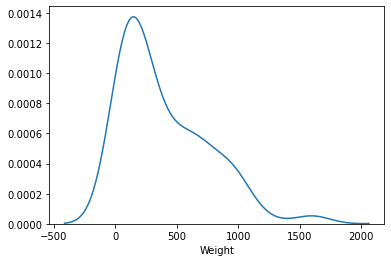

In [50]:
sns.distplot(df['Weight'],hist=False)

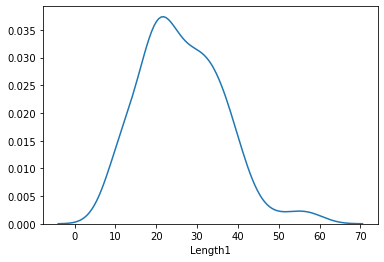

In [51]:
sns.distplot(df['Length1'],hist=False)
plt.show()

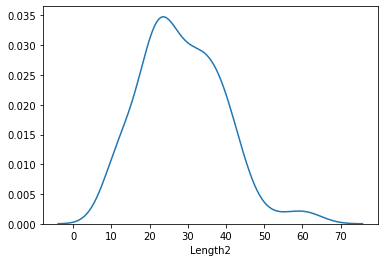

In [52]:
sns.distplot(df['Length2'],hist=False)
plt.show()

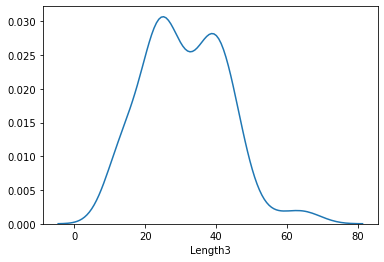

In [53]:
sns.distplot(df['Length3'],hist=False)
plt.show()

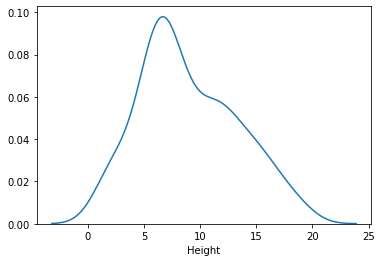

In [54]:
sns.distplot(df['Height'],hist=False)
plt.show()

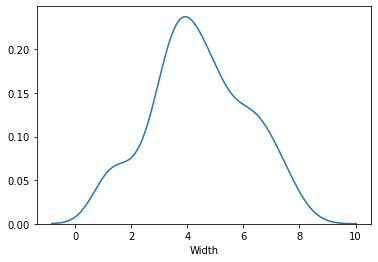

In [55]:
sns.distplot(df['Width'],hist=False)
plt.show()

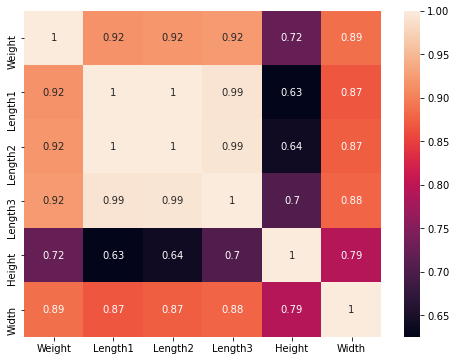

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

remove outlier using Z-Score

In [57]:
mn_wht=np.mean(df['Weight'])
std_wht=np.std(df['Weight'])
outlier=[]
for i in df['Weight']:
    outlier.append((i-mn_wht)/std_wht)
temp=pd.DataFrame(outlier)
for i in temp[0]:
    if i>3:
        print(temp[temp[0]==i][0])    

142    3.36744
Name: 0, dtype: float64
143    3.227325
Name: 0, dtype: float64
144    3.507554
Name: 0, dtype: float64


In [58]:
import scipy as sc
z=sc.stats.zscore(df['Length1'])
temp=pd.DataFrame(z)
for i in temp[0]:
    if i>3:
        print(temp[temp[0]==i][0])    

144    3.286801
Name: 0, dtype: float64


In [59]:
z=sc.stats.zscore(df['Length2'])
temp=pd.DataFrame(z)
for i in temp[0]:
    if i>3:
        print(temp[temp[0]==i][0])    

144    3.274892
Name: 0, dtype: float64


In [60]:
z=sc.stats.zscore(df['Length3'])
temp=pd.DataFrame(z)
for i in temp[0]:
    if i>3:
        print(temp[temp[0]==i][0])    

144    3.177292
Name: 0, dtype: float64


In [61]:
z=sc.stats.zscore(df['Height'])
temp=pd.DataFrame(z)
for i in temp[0]:
    if i>3:
        print(temp[temp[0]==i][0])    

In [62]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [63]:
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
131,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198
27,Bream,714.0,32.7,36.0,41.5,16.5170,5.8515
102,Perch,300.0,25.2,27.3,28.7,8.3230,5.1373
38,Roach,87.0,18.2,19.8,22.2,5.6166,3.1746
115,Perch,690.0,34.6,37.0,39.3,10.5717,6.3666
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
114,Perch,700.0,34.5,37.0,39.4,10.8350,6.2646


In [64]:
fish=df.drop([144])

In [65]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.00000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,390.40443,26.039873,28.194304,30.994304,8.959342,4.398103
std,344.85164,9.679323,10.379127,11.268932,4.297309,1.673296
min,0.00000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.00000,19.025000,21.000000,23.125000,5.940600,3.380625
50%,272.50000,25.100000,27.150000,29.350000,7.733000,4.248050
75%,642.50000,32.650000,35.000000,39.575000,12.371850,5.577375
max,1600.00000,56.000000,60.000000,64.000000,18.957000,8.142000


In [66]:
fish.shape

(158, 7)

In [67]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [68]:
X=fish.iloc[:,2:7]
y=fish['Weight']
y=np.array(y)
y=y.reshape(-1,1)
y.shape

(158, 1)

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score

In [70]:
x_scale=MinMaxScaler()
y_scale=MinMaxScaler()
X=x_scale.fit_transform(X)
y=y_scale.fit_transform(y)

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [72]:
linr=LinearRegression()
linr.fit(X_train,y_train)

LinearRegression()

In [73]:
linr.intercept_

array([-0.16636709])

In [74]:
linr.coef_

array([[ 2.08977412, -0.15234234, -1.23269404,  0.32475839,  0.06278039]])

In [75]:
prediction=linr.predict(X_train)

In [76]:
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error

In [77]:
accuracy=linr.score(X_test,y_test)

In [78]:
accuracy

0.8834754170865344

In [80]:
r2_score(y_train,prediction)

0.8823120949502389

In [82]:
cross_val=cross_val_score(linr,X_train,y_train,cv=10,scoring='r2')

In [83]:
cross_val

array([0.87767952, 0.89641703, 0.8484991 , 0.89118514, 0.92581413,
       0.73461454, 0.53696271, 0.75528197, 0.53352927, 0.89203788])

In [84]:
cross_val.mean()

0.7892021280303392

In [85]:
pread_cross=linr.predict(X_test)

In [86]:
r2_score(y_test,pread_cross)

0.8834754170865344